# Let's map some earthquakes!

Use this notebook to complete your final project for unit 4. You'll create a dataframe for the data you downloaded and then plot the earthquakes using latitude and longitude. You'll also create functions to make your code more efficient.

Import the libraries you need here:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

This code adds an image behind your plot:

Create your data frame:

In [2]:
df = pd.read_csv("results.csv")
lat = df["LATITUDE"]
long = df["LONGITUDE"]
primary = df["EQ_PRIMARY"]
focal = df["FOCAL_DEPTH"]
deaths = df["DEATHS"]
damage = df["DAMAGE_MILLIONS_DOLLARS"]
houses = df["HOUSES_DESTROYED"]


Try plotting your earthquakes!
Hint: You will need to use the "LATITUDE" and "LONGITUDE" columns

You will also need xlim and ylim to focus the map on your region. Use the following limits:
- North America: xlim = (-180,-50), ylim = (0,90)
- Central America: xlim = (-100,-70), ylim = (0,25)
- South America: xlim = (-120,-20), ylim = (-60,20)
- Africa: xlim = (-25,50), ylim = (-40,45)
- Pacific: xlim = (80,180), ylim = (-70,30)

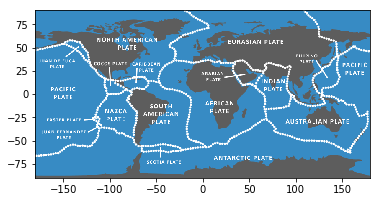

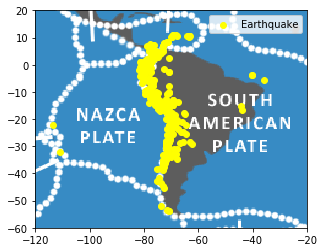

In [6]:
image = plt.imread("plates.png")
fig, ax = plt.subplots()
ax.imshow(image, extent = [-180,180,-90,90])
plt.scatter(long, lat, color = "yellow", )
plt.legend(labels = ["Earthquake"])
plt.xlim([-120, -20])
plt.ylim([-60, 20])
plt.show()

Replace your (image = plt.imread("earth.jpg")) code with the following and see what happens:
image = plt.imread("plates.png")

What do you notice?

### Let's add some color (and functions)
Next, you'll need to color code your points based on one of the characteristics in the data frame. 

First, create a function that takes the name of a column and a number of colors and returns list of intermediate values based on the number of colors you specify (these values will be the boundaries for conditionals later on).

In [25]:
print(primary.max())
print(primary.min())

9.5
4.0


In [13]:
primmax = primary.max()
primmin = primary.min()
print(primmax-primmin)
magdifference = primmax-primmin

5.5


In [43]:
print(magdifference / 5)
interval = magdifference/5

0.620921323059


In [75]:
my_list = []
def beepboop(column, num_color):
    columns = df[column]
    EQmax = columns.max()
    EQmin = columns.min()
    cn = EQmin
    rangee = EQmax - EQmin
    interval = ((rangee)/(num_color))
    while len(my_list) < num_color:
        cn += interval
        my_list.append(cn)
    return my_list

In [100]:
beepboop("EQ_PRIMARY", 5)

[4.6875, 5.375, 6.0625, 6.75, 7.4375, 8.125, 8.8125, 9.5]

Next, you will make your own version of the colormap we used to color the stars in the astrophysics unit. You will need to make a list that contains a color for each value of the characteristic you have chosen. Think back to the climate change unit for ideas...

You should create a function that takes the name of your characteristic column and a list of RGB value lists and creates a list of values for the "colormap".

Hint: You will need to use the last function you created. You can call this function inside of your new function.

In [120]:
def colormap(col):
    intlist = beepboop(col, 5) 
    colors = []
    for item in df[col]:
        if item <= intlist[0]:
            colors.append([11/255, 198/255, 74/255])
        elif item <= intlist[1]:
            colors.append([11/255,198 /255, 14/255])
        elif item <= intlist[2]:
            colors.append([104/255, 198/255, 11/255])
        elif item <= intlist[3]:
            colors.append([198/255, 194/255, 11/255])
        elif item <= intlist[4]:
            colors.append([198/255, 176/255, 11/255])
        elif item <= intlist[5]:
            colors.append([198/255, 151/255, 11/255])
        elif item <= intlist[6]:
            colors.append([198/255, 101/255, 11/255])
        elif item <= intlist[7]:
            colors.append([198/255, 11/255, 11/255])
        else:
            colors.append([0/255, 0/255, 0/255])
    return colors

colorlist = colormap("EQ_PRIMARY")

Next, plot your graph again, adding the argument c = your "colormap" to the scatterplot function:

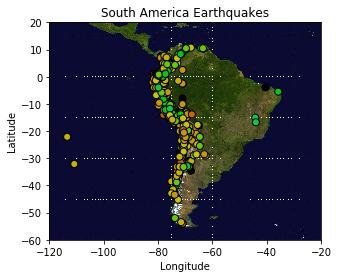

In [140]:
image = plt.imread("earth.jpg")
fig, ax = plt.subplots()
ax.imshow(image, extent = [-180,180,-90,90])
plt.scatter(long, lat, s=50 , c = colorlist, edgecolor = "black")
plt.xlim(-120, -20)
plt.ylim(-60, 20)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("South America Earthquakes")
plt.show()

Replace your (image = plt.imread("earth.jpg")) code with the following and see what happens:
image = plt.imread("plates.png")

What do you notice?

### Challenge: 
Change the size of your markers based on a second characteristic